<a href="https://colab.research.google.com/github/vigneshshiv28/DAV_60/blob/main/DAV_EXP4%2C5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment 4,5,6
### Time series Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [ ]:
dataset = pd.read_csv("/content/monthly-beer-production-in-austr.csv")

dataset.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [ ]:
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [ ]:
indexedDataset.head(5)

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


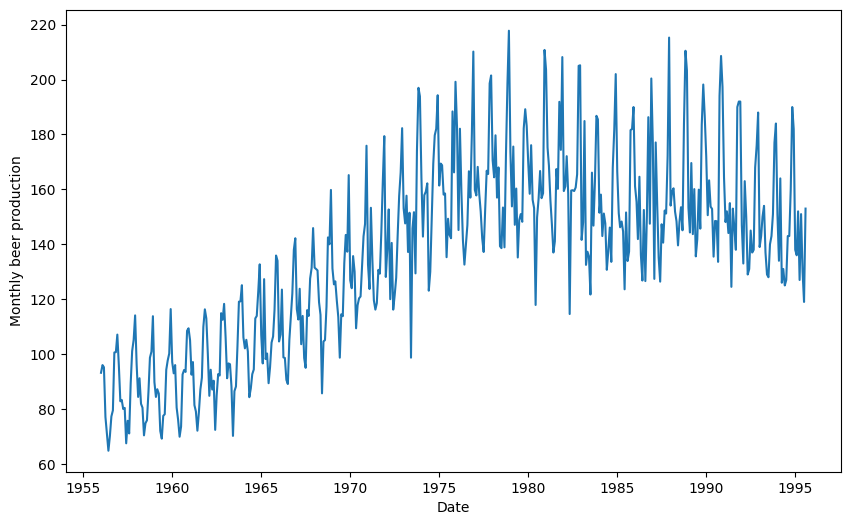

In [ ]:
#Raw data
plt.xlabel("Date")
plt.ylabel("Monthly beer production")
plt.plot(indexedDataset)

In [ ]:
# Detecting Stationarity using Rolling Statistics
rollmean = indexedDataset.rolling(window=12).mean()

rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            Monthly beer production
Month                              
1956-01-01                      NaN
1956-02-01                      NaN
1956-03-01                      NaN
1956-04-01                      NaN
1956-05-01                      NaN
...                             ...
1995-04-01               146.166667
1995-05-01               147.833333
1995-06-01               148.250000
1995-07-01               147.583333
1995-08-01               148.416667

[476 rows x 1 columns]             Monthly beer production
Month                              
1956-01-01                      NaN
1956-02-01                      NaN
1956-03-01                      NaN
1956-04-01                      NaN
1956-05-01                      NaN
...                             ...
1995-04-01                21.391729
1995-05-01                20.875533
1995-06-01                20.423360
1995-07-01                21.292160
1995-08-01                21.292160

[476 rows x 1 columns]


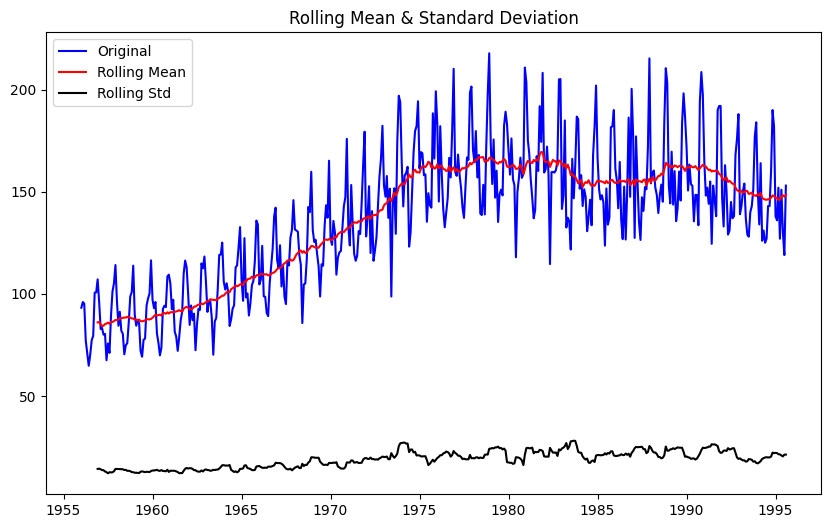

In [ ]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

In [ ]:
print(dataset.columns)

Index(['Month', 'Monthly beer production'], dtype='object')


In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['Monthly beer production'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p-value', '#Lags used', 'No. of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical value (%s)' % key] = value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic               -2.282661
p-value                       0.177621
#Lags used                   17.000000
No. of observations used    458.000000
Critical value (1%)          -3.444709
Critical value (5%)          -2.867871
Critical value (10%)         -2.570142
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['Monthly beer production'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

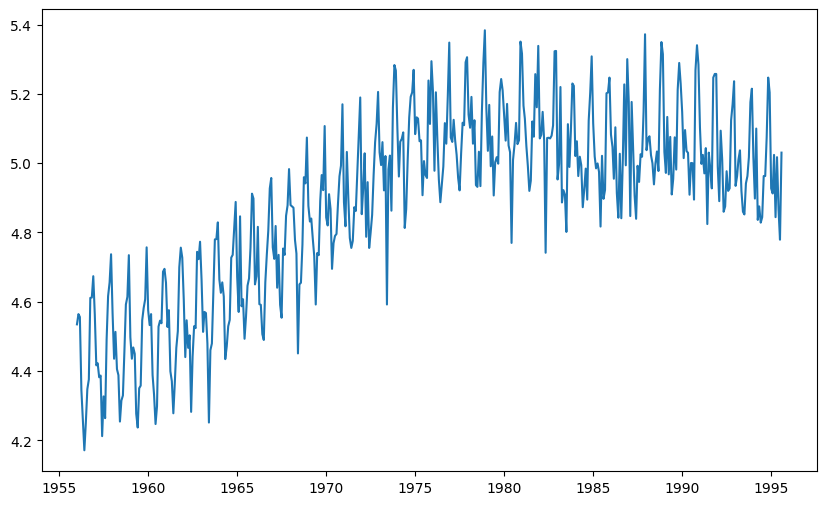

In [ ]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

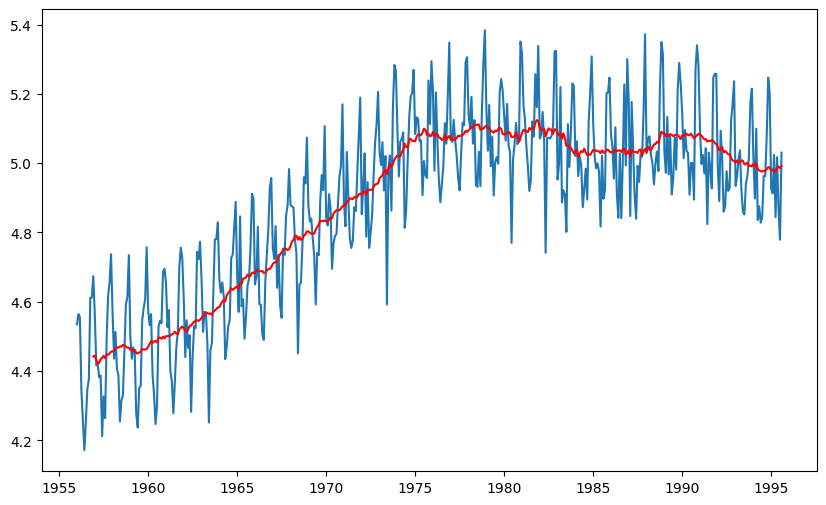

In [ ]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [ ]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,Monthly beer production
Month,
1956-01-01,NaN
1956-02-01,NaN
1956-03-01,NaN
1956-04-01,NaN
1956-05-01,NaN
1956-06-01,NaN
1956-07-01,NaN
1956-08-01,NaN
1956-09-01,NaN


In [ ]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,Monthly beer production
Month,
1956-12-01,0.231830
1957-01-01,0.118994
1957-02-01,-0.015558
1957-03-01,0.001590
1957-04-01,-0.041908
1957-05-01,-0.047399
1957-06-01,-0.225688
1957-07-01,-0.117442
1957-08-01,-0.173166


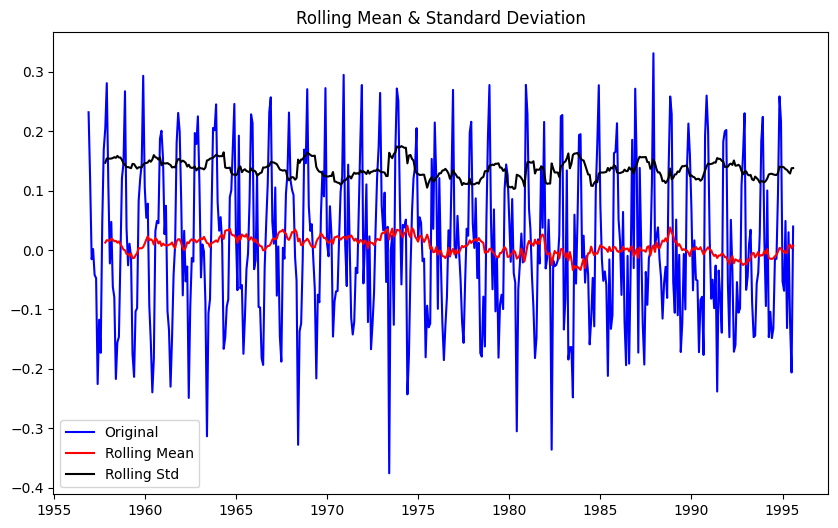

Results of Dickey Fuller Test
Test statistic               -3.432559
p-value                       0.009898
#Lags used                   13.000000
No. of observations used    451.000000
Critical value (1%)          -3.444933
Critical value (5%)          -2.867970
Critical value (10%)         -2.570195
dtype: float64


In [ ]:
test_stationarity(dataLogScaleMinusMovingAverage)

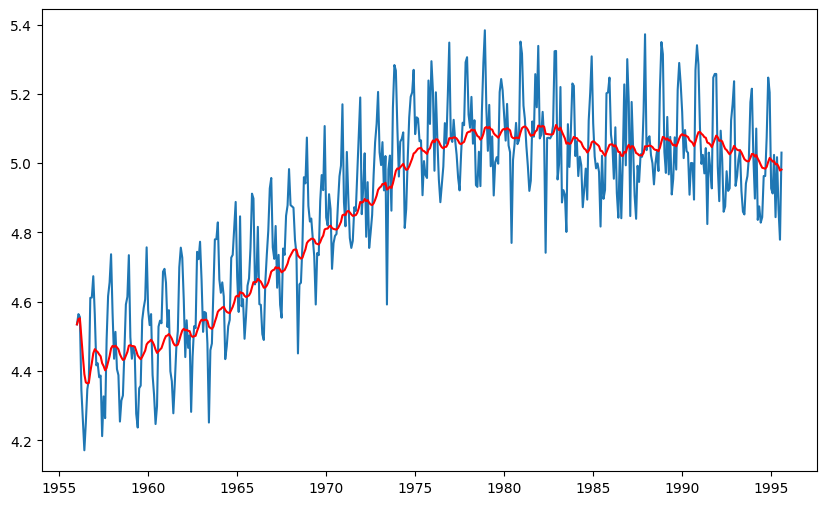

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

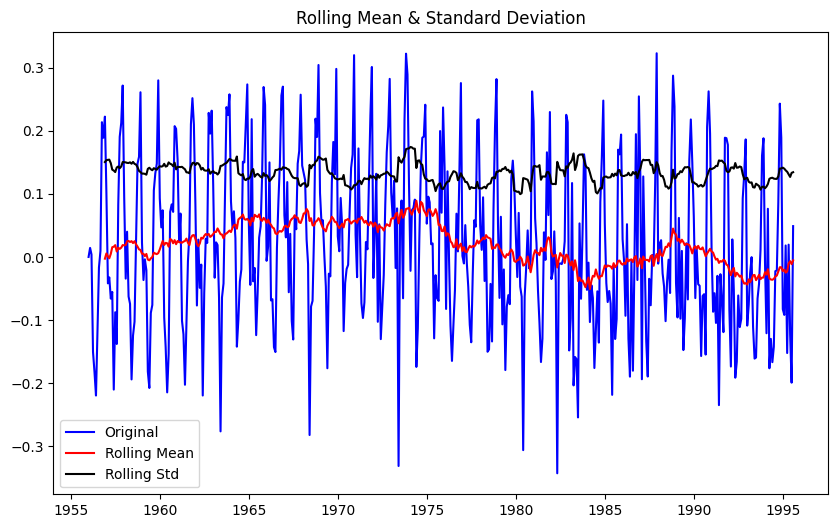

Results of Dickey Fuller Test
Test statistic               -1.507616
p-value                       0.529740
#Lags used                   13.000000
No. of observations used    462.000000
Critical value (1%)          -3.444584
Critical value (5%)          -2.867816
Critical value (10%)         -2.570113
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

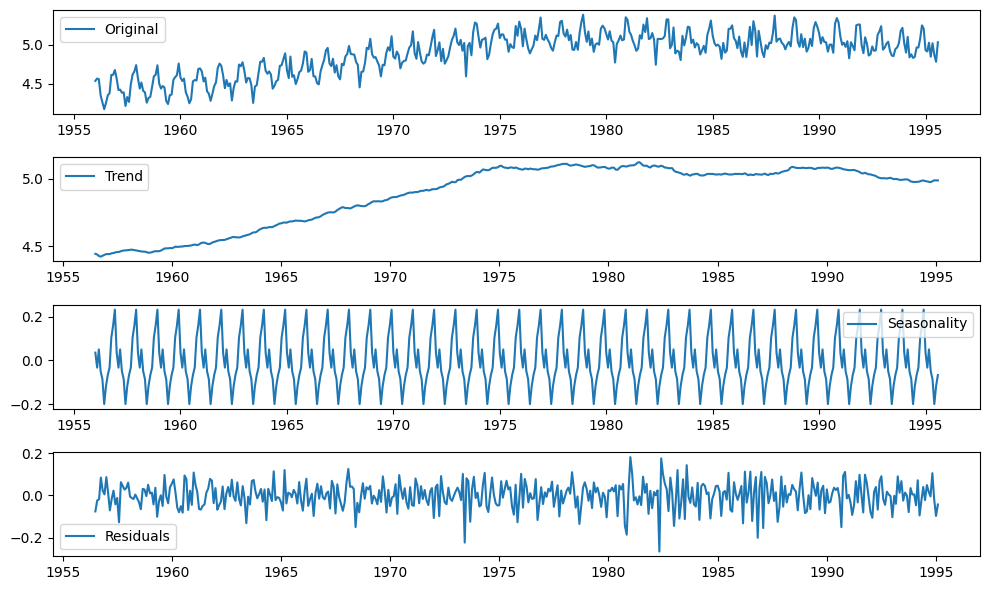

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
1956-07-01   -0.075295
1956-08-01   -0.023731
1956-09-01   -0.018133
1956-10-01    0.084279
1956-11-01    0.022530
                ...   
1994-10-01   -0.004604
1994-11-01    0.105032
1994-12-01   -0.017651
1995-01-01   -0.096675
1995-02-01   -0.042798
Name: resid, Length: 464, dtype: float64


In [ ]:
decomposedLogData.describe()

count    464.000000
mean      -0.000075
std        0.061927
min       -0.264703
25%       -0.038039
50%        0.005082
75%        0.039594
max        0.180806
Name: resid, dtype: float64

In [ ]:
decomposedLogData.head(12)

Month
1956-07-01   -0.075295
1956-08-01   -0.023731
1956-09-01   -0.018133
1956-10-01    0.084279
1956-11-01    0.022530
1956-12-01    0.005096
1957-01-01    0.086388
1957-02-01    0.008372
1957-03-01   -0.070303
1957-04-01   -0.015494
1957-05-01    0.022911
1957-06-01   -0.042018
Name: resid, dtype: float64

## AR Model
### Plot the ACF and PACF graphs

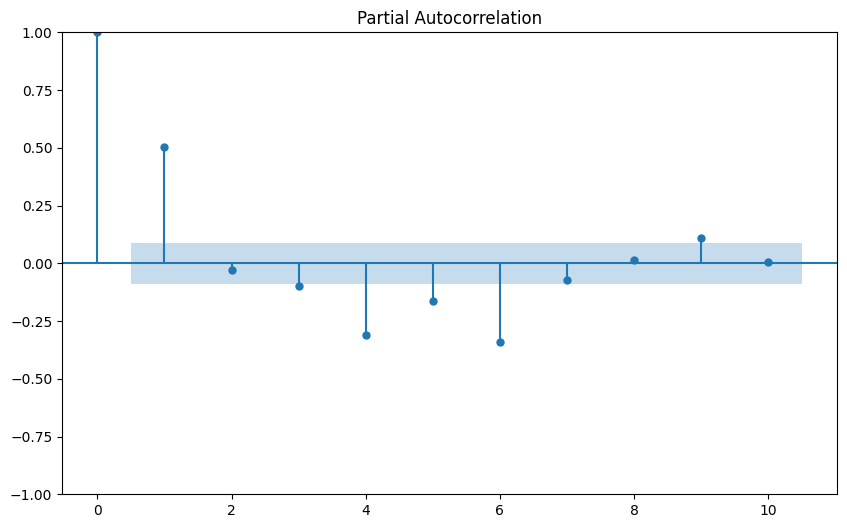

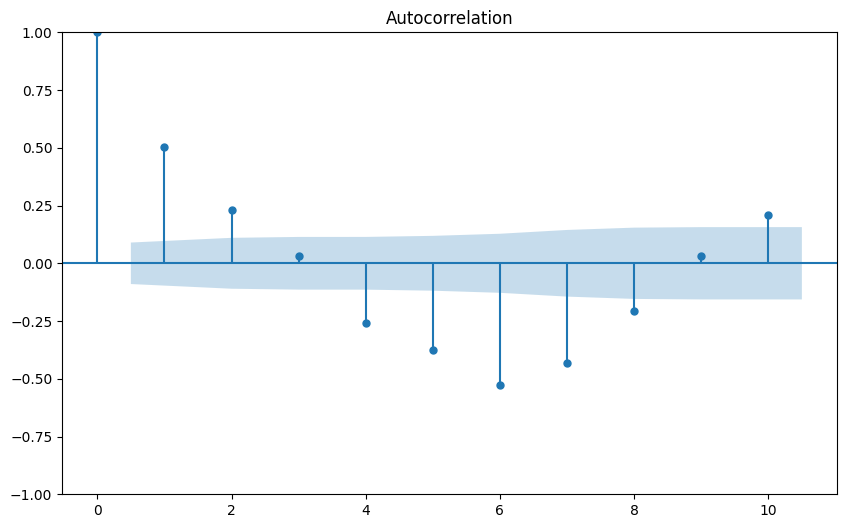

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

In [ ]:
#Split the LogScale Data for Training & Testing
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_1.summary())

                               AutoReg Model Results                               
Dep. Variable:     Monthly beer production   No. Observations:                  416
Model:                          AutoReg(1)   Log Likelihood                 315.383
Method:                    Conditional MLE   S.D. of innovations              0.113
Date:                     Mon, 01 Apr 2024   AIC                           -624.765
Time:                             17:23:49   BIC                           -612.680
Sample:                         02-01-1956   HQIC                          -619.986
                              - 08-01-1990                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0120      0.006      2.127      0.033       0.001       0.023
Monthly beer production.L1     0.5064      

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [ ]:
print(len(train))

416


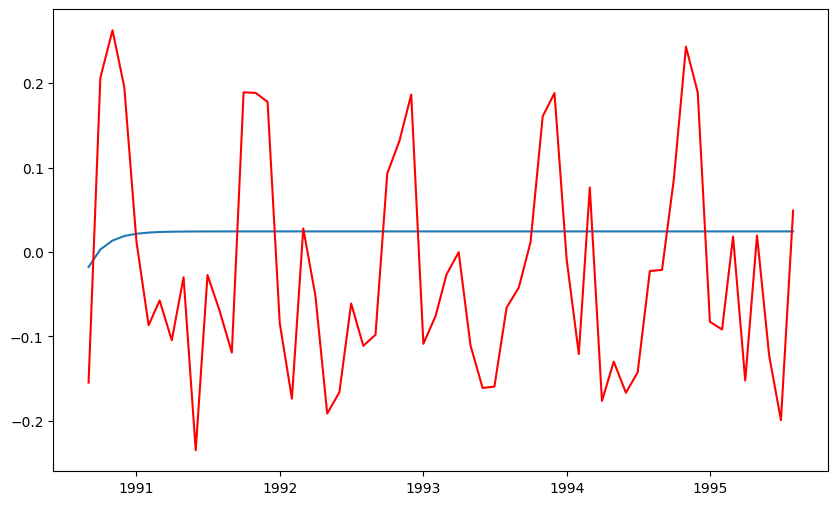

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.13744259577259288


In [ ]:
#Future Prediction
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1995-10-01    0.024356
1995-11-01    0.024356
1995-12-01    0.024356
1996-01-01    0.024356
1996-02-01    0.024356
1996-03-01    0.024356
1996-04-01    0.024356
1996-05-01    0.024356
1996-06-01    0.024356
1996-07-01    0.024356
1996-08-01    0.024356
1996-09-01    0.024356
1996-10-01    0.024356
1996-11-01    0.024356
1996-12-01    0.024356
1997-01-01    0.024356
1997-02-01    0.024356
1997-03-01    0.024356
1997-04-01    0.024356
1997-05-01    0.024356
1997-06-01    0.024356
1997-07-01    0.024356
1997-08-01    0.024356
1997-09-01    0.024356
1997-10-01    0.024356
1997-11-01    0.024356
1997-12-01    0.024356
1998-01-01    0.024356
1998-02-01    0.024356
1998-03-01    0.024356
1998-04-01    0.024356
1998-05-01    0.024356
1998-06-01    0.024356
1998-07-01    0.024356
1998-08-01    0.024356
1998-09-01    0.024356
1998-10-01    0.024356
1998-11-01    0.024356
1998-12-01    0.024356
1999-01-01    0.024356
1999-02-01    0.024356
1999-03-01    0.024356
1999-0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## ARIMA Model

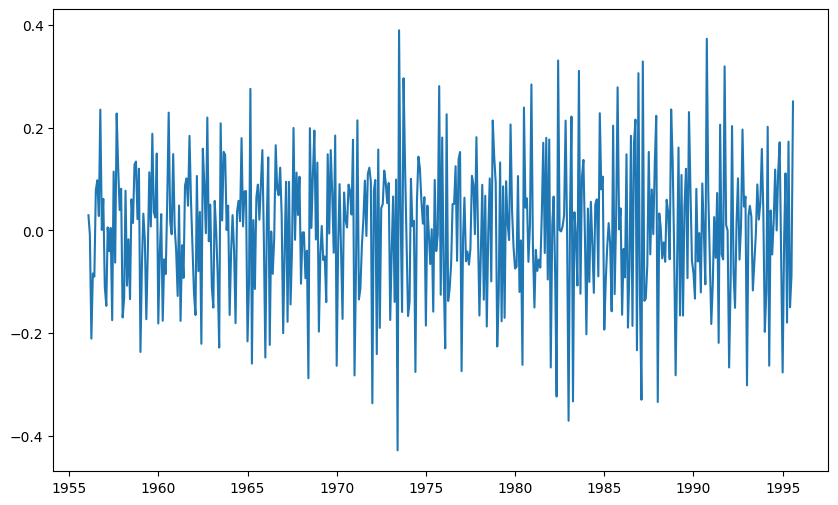

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

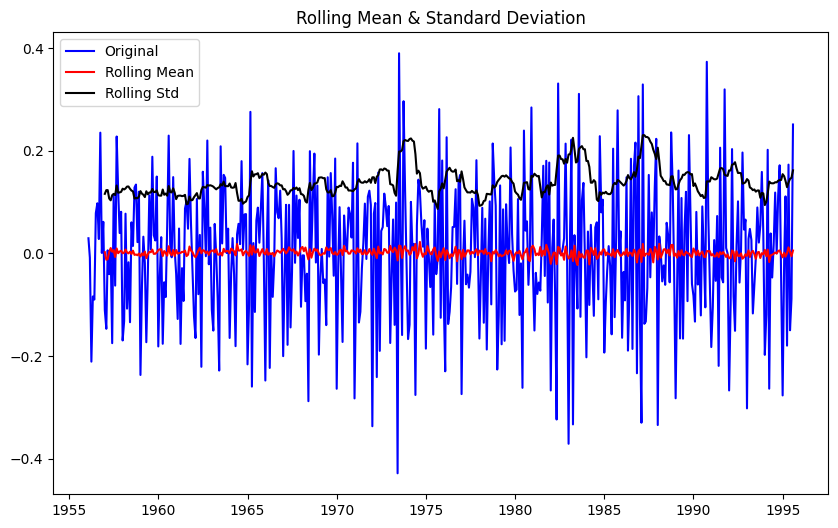

Results of Dickey Fuller Test
Test statistic               -4.869646
p-value                       0.000040
#Lags used                   18.000000
No. of observations used    456.000000
Critical value (1%)          -3.444772
Critical value (5%)          -2.867899
Critical value (10%)         -2.570157
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

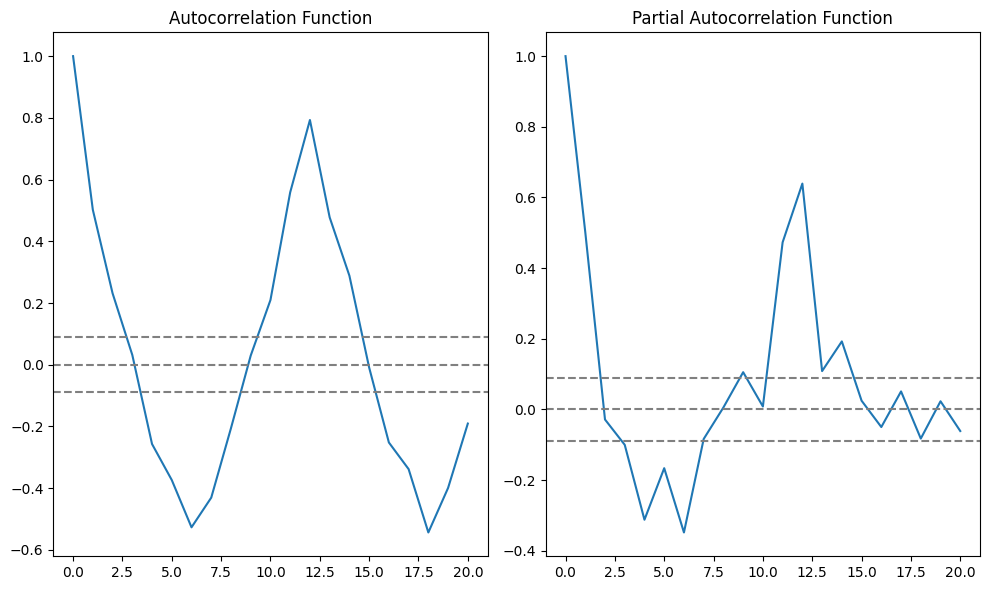

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Month
1956-01-01    0.018675
1956-02-01    0.009311
1956-03-01    0.016983
1956-04-01    0.011172
1956-05-01   -0.068215
                ...   
1995-04-01    0.021547
1995-05-01   -0.069521
1995-06-01    0.023922
1995-07-01   -0.054351
1995-08-01   -0.089802
Length: 476, dtype: float64
RSS: 6.172848
Plotting AR Model


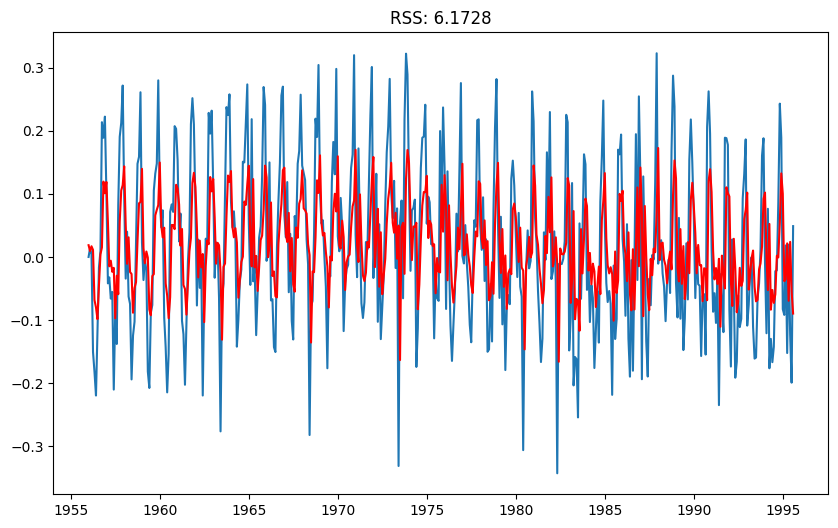

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Month
1956-01-01    0.018705
1956-02-01    0.010474
1956-03-01    0.017761
1956-04-01    0.013005
1956-05-01   -0.059807
                ...   
1995-04-01    0.034233
1995-05-01   -0.058529
1995-06-01    0.020545
1995-07-01   -0.033538
1995-08-01   -0.084784
Length: 476, dtype: float64
RSS: 6.287416
Plotting Ma Model


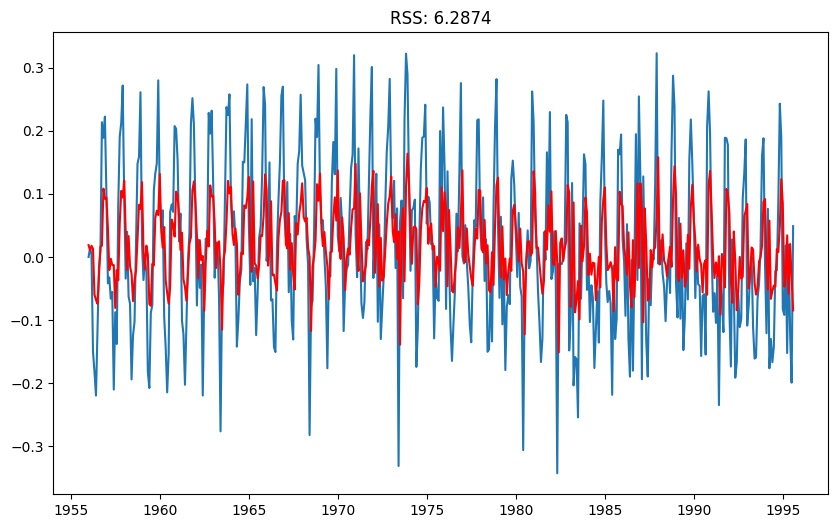

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting Ma Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Month
1956-01-01    0.018686
1956-02-01    0.015040
1956-03-01    0.015773
1956-04-01    0.015351
1956-05-01   -0.010985
                ...   
1995-04-01   -0.066628
1995-05-01   -0.107886
1995-06-01   -0.107912
1995-07-01   -0.075914
1995-08-01   -0.024793
Length: 476, dtype: float64
RSS: 3.953805
Plotting ARIMA Model


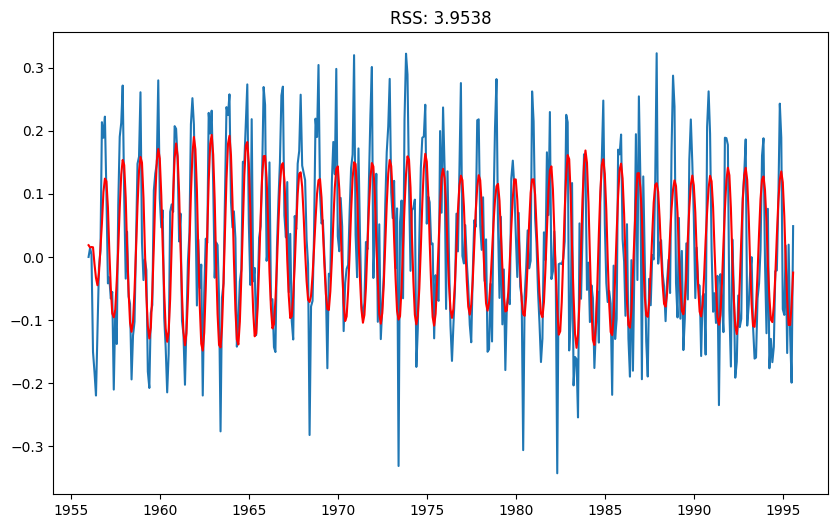

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011448
1956-04-01    0.002746
1956-05-01   -0.104201
                ...   
1995-04-01    0.010214
1995-05-01   -0.087226
1995-06-01    0.028880
1995-07-01   -0.087594
1995-08-01   -0.081532
Length: 476, dtype: float64
RSS: 6.123411
Plotting ARIMA Model


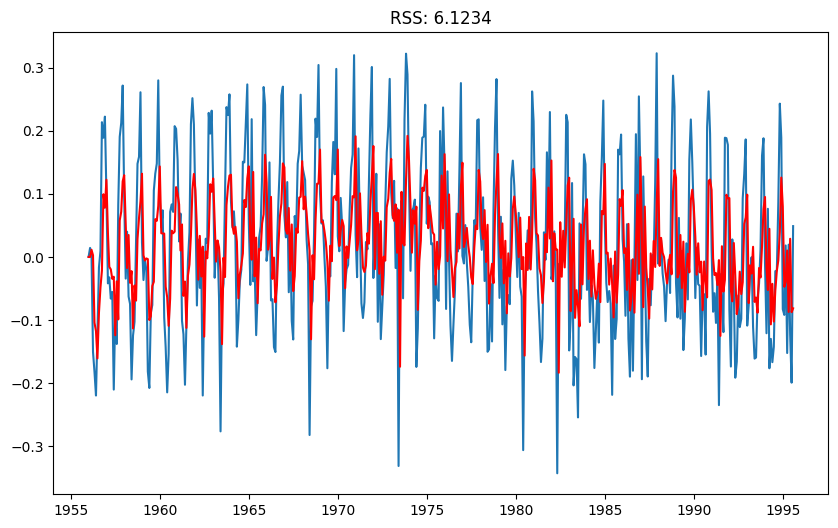

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-651.710, Time=5.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-543.335, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-565.457, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.879, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-545.307, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-579.786, Time=2.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-581.082, Time=2.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-649.642, Time=3.25 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-650.199, Time=4.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-648.759, Time=1.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-646.408, Time=3.54 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-579.172, Time=2.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-645.848, Time=5.03 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-649.575, Time=1.27 sec

Best model:  ARIMA(2,1,2)(0,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  476
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 331.855
Date:                Mon, 01 Apr 2024   AIC                           -651.710
Time:                        17:32:39   BIC                           -626.730
Sample:                    01-01-1956   HQIC                          -641.887
                         - 08-01-1995                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.001      2.112      0.035     8.1e-05       0.002
ar.L1         -0.2925      0.123     -2.374      0.018      -0.534      -0.051
ar.L2          0.3674      0.091      4.023      0.000       0.188       0.546
ma.L1         -0.1007      0.104     -0.973      0.331      -0.304       0.102
ma.L2         -0.8118      0.102     -7.933      0.000      -1.012      -0.611
sigma2         0.0144      0.001     14.210      0.000       0.012       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.52
Prob(Q):                              0.70   Prob(JB):                         0.28
Heteroskedasticity (H):               1.25   Skew:                            -0.13
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Month
1956-01-01    0.000000
1956-02-01    0.000000
1956-03-01    0.011688
1956-04-01    0.006479
1956-05-01   -0.125018
                ...   
1995-04-01   -0.116950
1995-05-01   -0.126565
1995-06-01   -0.061781
1995-07-01   -0.069387
1995-08-01   -0.057067
Length: 476, dtype: float64
RSS: 4.514865
Plotting ARIMA Model


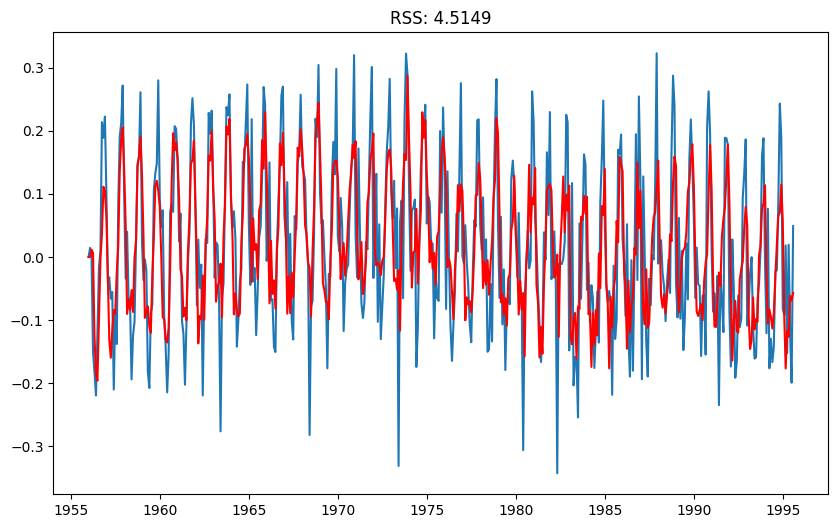

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['Monthly beer production'])**2))
print("Plotting ARIMA Model")

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.012155
1956-05-01   -0.039074
1956-06-01   -0.059525
                ...   
1995-04-01   -0.062788
1995-05-01    0.071898
1995-06-01   -0.053990
1995-07-01    0.031826
1995-08-01    0.025523
Length: 475, dtype: float64
RSS: 7.375403
Plotting ARIMA Model


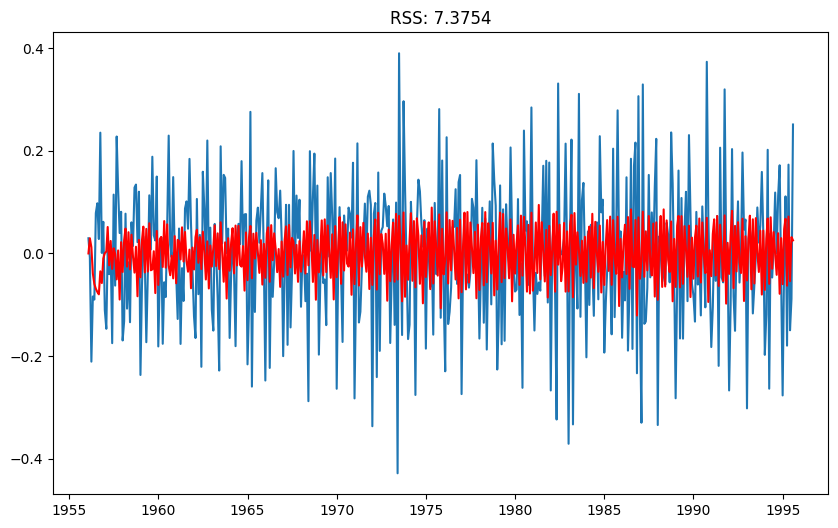

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Monthly beer production'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Monthly beer production'])**2))
print("Plotting ARIMA Model")

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.012155
1956-05-01   -0.039074
1956-06-01   -0.059525
dtype: float64


In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.041756
1956-05-01    0.002681
1956-06-01   -0.056843
dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['Monthly beer production'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1956-01-01    4.534748
1956-02-01    4.534748
1956-03-01    4.564348
1956-04-01    4.576503
1956-05-01    4.537429
dtype: float64

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

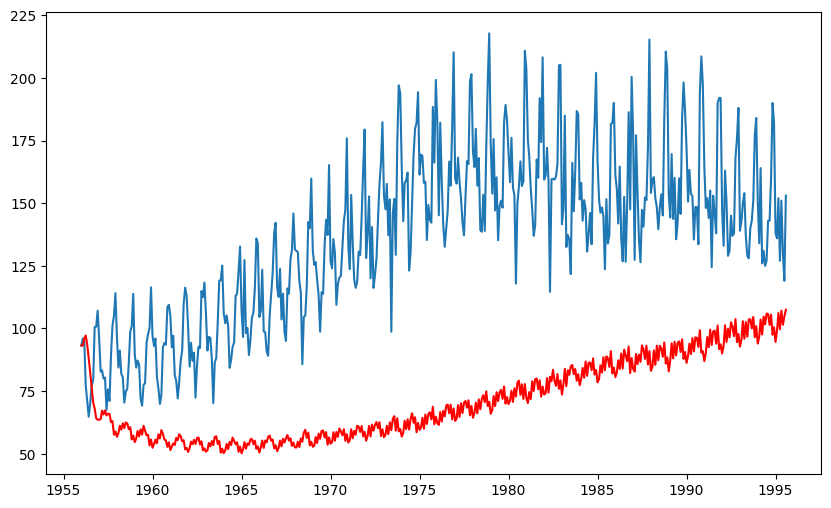

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

In [ ]:
# Check the dimension of the dataset
indexedDataset_logScale

,Monthly beer production
Month,
1956-01-01,4.534748
1956-02-01,4.564348
1956-03-01,4.555980
1956-04-01,4.345103
1956-05-01,4.261270
...,...
1995-04-01,4.844187
1995-05-01,5.017280
1995-06-01,4.867534


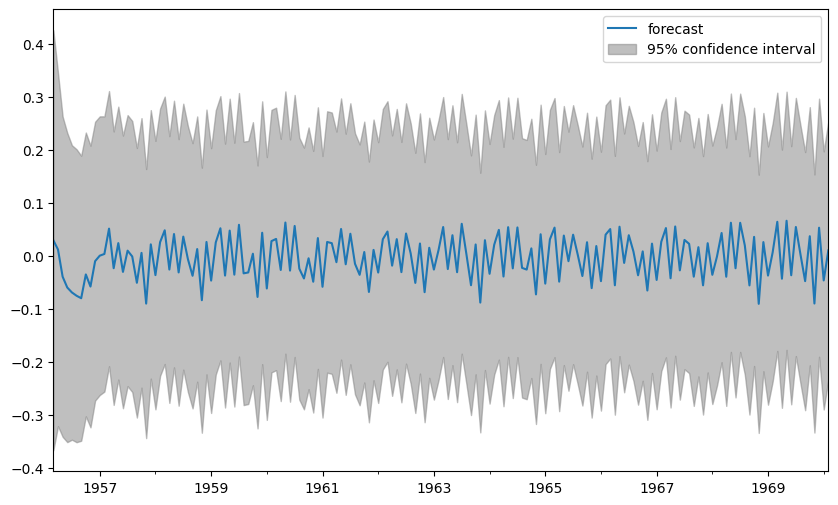

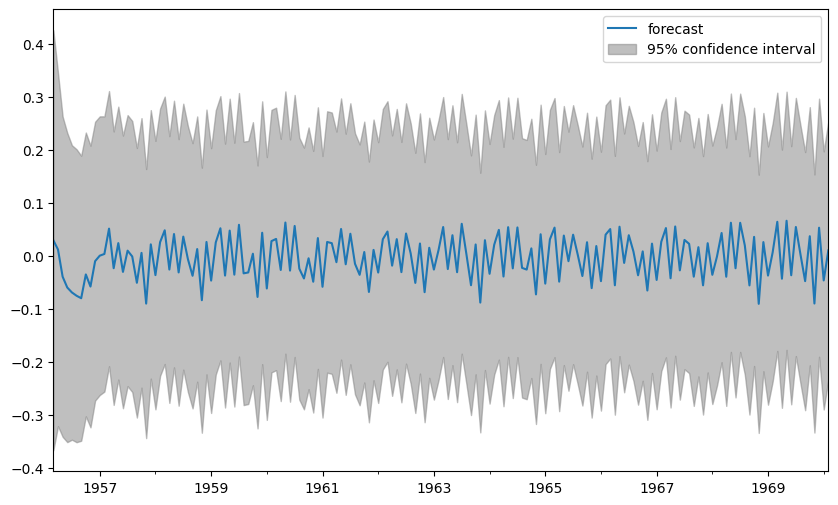

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

1995-09-01   -0.041351
1995-10-01    0.023039
1995-11-01   -0.059624
1995-12-01    0.062470
1996-01-01   -0.033726
1996-02-01    0.001142
1996-03-01    0.033339
1996-04-01   -0.055498
1996-05-01    0.066464
1996-06-01   -0.056224
1996-07-01    0.034321
1996-08-01    0.000187
1996-09-01   -0.031197
1996-10-01    0.057252
1996-11-01   -0.064538
1996-12-01    0.057958
1997-01-01   -0.032440
1997-02-01    0.001673
1997-03-01    0.032944
1997-04-01   -0.055294
1997-05-01    0.066244
1997-06-01   -0.056026
1997-07-01    0.034232
1997-08-01    0.000136
Freq: MS, Name: predicted_mean, dtype: float64